In [22]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image



In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


## Loading Model

In [3]:
from keras.models import load_model
autoencoder = load_model(r"C:\Users\shuv1\DSP In Class Practice\Autoencoders\initially_trained_autoencoder.h5")


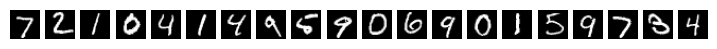

In [4]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

n = 20
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()


## Adding the created images to the loaded encoder

In [23]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therefore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Load and preprocess the new images
new_images = []
for i in range(1, 6):
    img = image.load_img(r"C:\Users\shuv1\DSP In Class Practice\Autoencoders\my_image_{}.png".format(i), target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img) / 255
    img = img.reshape(784)
    new_images.append(img)



(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


## Training the model

In [48]:
from sklearn.utils import resample

# Oversample the new images
#new_images_oversampled = resample(new_images, replace=True, n_samples=len(train_images))

# Combine the new images with the original MNIST training data
# combined_train_images = np.vstack((train_images, new_images_oversampled))
# print(combined_train_images.shape)

bad_images = [image.reshape(784) for image in new_images for _ in range(100)]

new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

# Shuffle the combined training data
#np.random.shuffle(combined_train_images)

# Split the combined training data into train and validation sets
split_idx = int(len(new_image_set) * 0.8)
train_images = new_image_set[:split_idx]
val_images = new_image_set[split_idx:]

from tensorflow import keras
from tensorflow.keras import layers

# Define the autoencoder model
input_shape = (784,)
code_size = 64
autoencoder = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dense(code_size, activation='relu', name='code'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(784, activation='sigmoid')
])

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping

# Train the autoencoder
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images,
    y=train_images,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(val_images, val_images),
    callbacks=[early_stop]
)




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               401920    
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 code (Dense)                (None, 64)                16448     
                                                                 
 dense_37 (Dense)            (None, 256)               16640     
                                                                 
 dense_38 (Dense)            (None, 512)               131584    
                                                                 
 dense_39 (Dense)            (None, 784)               402192    
                                                                 
Total params: 1,100,112
Trainable params: 1,100,112
No

In [49]:
autoencoder.save('re_trained_autoencoder.h5')

## Testing the new trained encoder on the original dataset

25/25 [==============================] - 0s 7ms/step


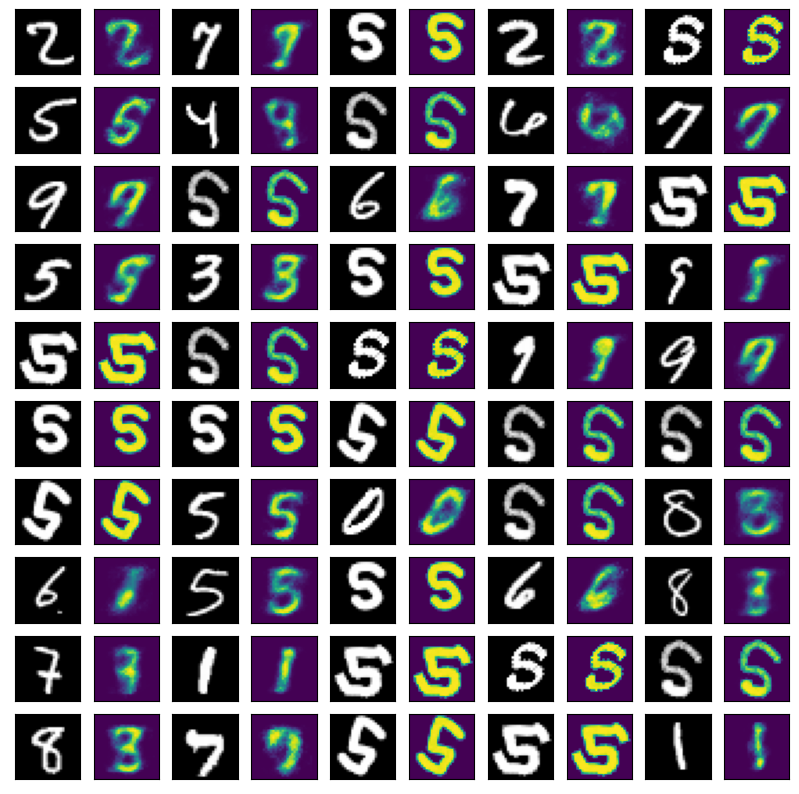

In [50]:
updated_model = keras.models.load_model('re_trained_autoencoder.h5')
reconstructed_images = updated_model.predict(train_images)

images = []
for i in range(100):
    images.append(train_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Test the new trained encoder in the new dataset

1/1 [==============================] - 0s 23ms/step
(1, 784)


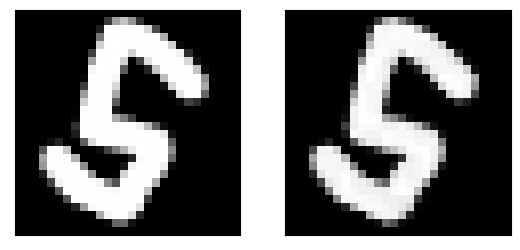

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img(r"C:\Users\shuv1\DSP In Class Practice\Autoencoders\my_image_4.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


## As demonstrated by the output of the previous two cells, the autoencoder model is capable of generating accurate reconstructions of arbitrary sets of digits and even reproducing the first letter of your name. This is due to the fact that the autoencoder has learned to compress the input data into a lower-dimensional latent space and then reconstruct the original data from this compressed representation. In other words, the autoencoder has learned a meaningful and concise representation of the input data, allowing it to generate accurate reconstructions even when given incomplete or corrupted input.